In [6]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os,sys,inspect, pickle
import numpy as np

In [7]:
class Style():
    def __init__(self, label, color, marker, hatch):
        self.label = label
        self.color = color
        self.marker = marker
        self.hatch = hatch
        self.index_history = None
styles = {
    'microsoft': Style('AutoAdmin', '#e15759', '.', '.'),
    'cophy': Style('CoPhy', '#b07aa1', 'p', '\\'),
    'reinforcement_learning': Style('Deep RL', '#9c755f', 'p', '\\'),
    'dexter': Style('Dexter', '#bab0ac', 'X', 'x'),
    'drop_heuristic': Style('Drop', '#f28e2b', 'P', 'o'),
    'epic': Style('Extend', '#4e79a7', 'd', '/'),
    'microsoft_naive_2': Style('Naive 2', '#9c755f', '.', ''),
    'ibm': Style('DB2Advis', '#59a14f', '*', '*'),
    'no_index': Style('No Index', '#76b7b2', '-', 'O'),
}

LABEL_FONT_SIZE = 12
TITLE_FONT_SIZE = 13
MARKER_SIZE = 7
LINE_WIDTH = 1
# GRAPH_SIZE = (5,3.333)
GRAPH_SIZE = (5,2.8)

In [8]:
df = pd.read_csv('../tpch_reinforcement_learning/combined_reinforcement_learning.csv', sep=';')
def get_costs_by_name(df):
    costs_by_name = {}
    
    for _, row in df.iterrows():
        row_cost = 0
        for column in df.columns:
            if column[0] == 'q':
                row_cost += float(json.loads(row[column])['Cost'])
        costs_by_name[row['algorithm name']] = row_cost
    
    return costs_by_name

In [9]:
costs = get_costs_by_name(df)
costs_no_index = costs['no_index']
# We dont want to draw the costs without index
del costs['no_index']

rel_costs = list(map(lambda x: x / costs_no_index, costs.values()))

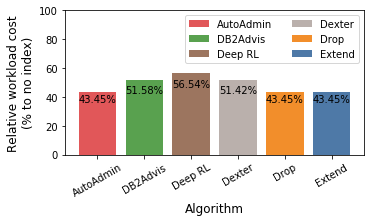

In [11]:
labels = []
rects = []
fig, ax = plt.subplots()
for idx, key in enumerate(costs.keys()):
    style = styles[key]
    rects.append(ax.bar(key, rel_costs[idx] * 100, label=style.label, color=style.color)[0])
    labels.append(style.label)

ax.set_xticklabels(labels, rotation=30)
ax.legend(ncol=2)
plt.ylabel('Relative workload cost\n(% to no index)', fontsize=LABEL_FONT_SIZE)
plt.xlabel('Algorithm', fontsize=LABEL_FONT_SIZE)
fig.tight_layout()
fig.set_size_inches(GRAPH_SIZE)
ax.set_ylim([0, 100])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.8*height, f'{height:.2f}%', ha='center', va='bottom')

autolabel(rects)
plt.show()
fig.savefig("../tpch_reinforcement_learning/tpch_reinforcement_learning.pdf", bbox_inches='tight')